In [1]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv('reviews.csv',parse_dates = ['Timestamp'])   # parse_dates 把str 看成date
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


###  Average/count rating by day

In [2]:
data['Day'] = data['Timestamp'].dt.date    # dt = datatime , date可以換成 month,time
data.head()
day_average = data.groupby(['Day']).count()       # 'Day' is not a column is index 

day_average.head()

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


### Number of Rating by Course

In [23]:
test = data.groupby(['Course Name'])['Rating'].count()
test


Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x1fd517d5dc0>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

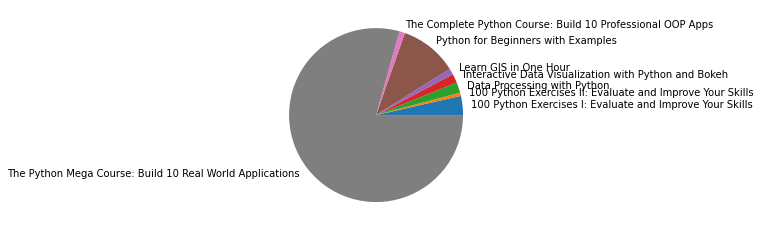

In [25]:
plt.pie(test, labels=test.index)

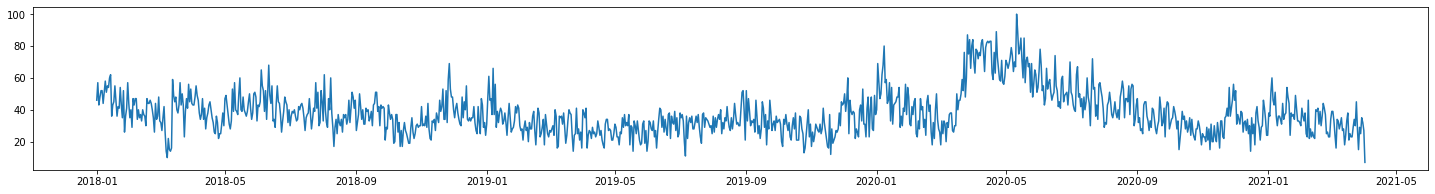

In [4]:
plt.figure(figsize=(25,3))

plt.plot(day_average.index,day_average['Rating'])

### Rating average by week

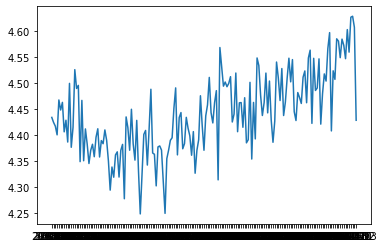

In [5]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')   #strftime = string from time
week_average = data.groupby(['Week']).mean()
week_average

plt.plot(week_average.index,week_average['Rating'])

### Average rating by month

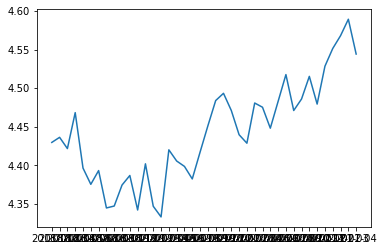

In [6]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')   #strftime = string from time
month_average = data.groupby(['Month']).mean()
month_average

plt.plot(month_average.index,month_average['Rating'])    # month_average.index = 一個list 裡面裝著很多日期

### Average rating by month by course

<AxesSubplot:xlabel='Month'>

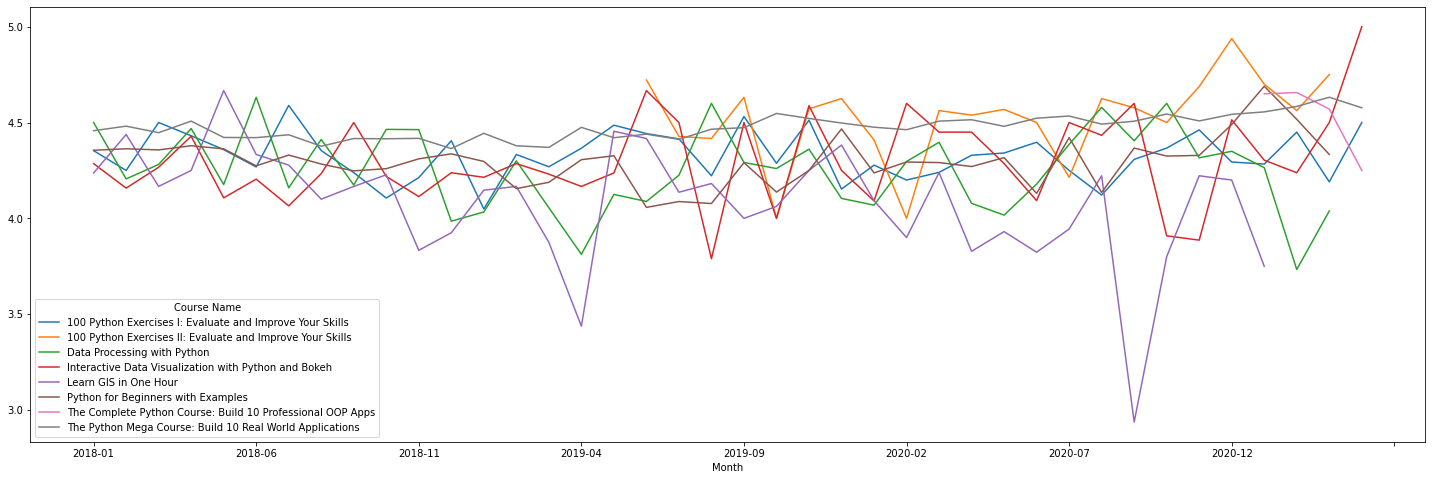

In [7]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_a_crs = data.groupby(['Month','Course Name'])['Rating'].mean().unstack()
month_a_crs
month_a_crs.plot(figsize=(25,8))

### What day are people the happiest?

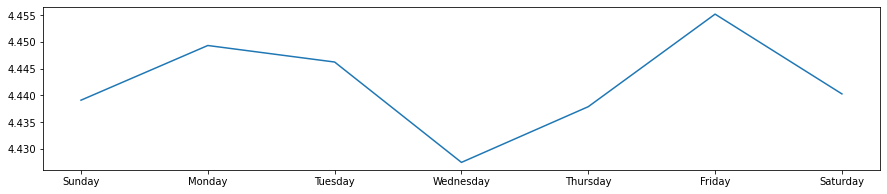

In [8]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_a_dn = data.groupby(['Weekday','Daynumber']).mean()
weekday_a_dn = weekday_a_dn.sort_values('Daynumber')                # .sort_values() 使index由小到大 因為daynumber已經變成time了
#weekday_a_dn                                                       # 如果只用Weekday的話 就無法按照順序排列 所以先搭配Daynumber 到最後再做區分

plt.figure(figsize=(15,3))
plt.plot(weekday_a_dn.index.get_level_values(0),weekday_a_dn['Rating'])   # .get_level_values() X軸 只要取一個index 
                                                                          #  weekday_a_dn 中有兩個list 分別是Weekday,Daynumber
                                                                          # 電腦同時讀取兩個的話 會不知道誰要當 X軸
        